# Global Mean Response: `t_surf`
* Wenchang Yang (wenchang@princeton.edu)
* Department of Geosciences, Princeton University

In [85]:
%matplotlib notebook
!date

import numpy as np
import matplotlib.pyplot as plt
# plt.rcParams['hatch.color']='g'
import xarray as xr
from scipy.stats import ttest_1samp

from plotsetting import *
from geoplots import mapplot, xticksyear, xticksmonth, yticks2lat
import geoxarray

Wed Jun  6 11:00:53 EDT 2018


In [86]:
# parameters
data_names = ['t_surf', ]
figname = f'fig_globalMean_{data_names[0]}.pdf'

enso = dict(
    nino=[7,  9, 12, 15, 17, 20, 22, 24, 27, 30],
    nina=[2,  6,  8, 13, 14, 18, 21, 25, 28, 29],
    neut=[1, 3, 4, 5, 10, 11, 16, 19, 23, 26]
)

### Agung data

In [87]:
# Agung data
daas_agung = dict()
for data_name in data_names[0:1]:
    from data_CTL1860 import open_ensemble as get_ctl
    from data_agung import open_data as get_volcano
    volcano_name = 'Agung'
    year_volcano = 1963
    ens = range(1,31)
    nbname = 'volcano_impact_on_climate_agung.ipynb'
    new_names = {'grid_xt': 'lon', 'grid_yt': 'lat'}

    ncfile = f'cache/{nbname}.{data_name}.ctl.nc'
    try:
        da_ctl = xr.open_dataarray(ncfile).load()
        print('Data loaded from', ncfile)
    except:
        da_ctl = get_ctl(data_name, ens=ens, year_volcano=year_volcano).rename(new_names).load()
        da_ctl.to_dataset().to_netcdf(ncfile)
        print('Data calculated and saved to', ncfile)

    ncfile = f'cache/{nbname}.{data_name}.nc'
    try:
        da_volcano = xr.open_dataarray(ncfile).load()
        print('Data loaded from', ncfile)
    except:
        da_volcano = get_volcano(data_name, ens=ens).rename(new_names).load()
        da_volcano.to_dataset().to_netcdf(ncfile)
        print('Data calculated and saved to', ncfile)

    daa = da_volcano - da_ctl
    if data_name in ('precip',):
        daa = daa * prcp_scale
        # ITCZ lat
        da = da_ctl.mean(['lon', 'en'])
        lat_itcz_agung = da.lat[da.argmax('lat')]
    
    for key in enso.keys():
        daas_agung[key] = dict()
        
        # volc - ctl
        da = daa.sel(en=enso[key]).geo.fldmean() # global mean
        daas_agung[key]['volc-ctl'] = da
        
        # ctl - clim
        da = da_ctl.sel(en=enso[key]).geo.fldmean().groupby('time.month') \
            - da_ctl.geo.fldmean().mean('en').groupby('time.month').mean('time')
        daas_agung[key]['ctl-clim'] = da


Data loaded from cache/volcano_impact_on_climate_agung.ipynb.t_surf.ctl.nc
Data loaded from cache/volcano_impact_on_climate_agung.ipynb.t_surf.nc


### StMaria data

In [88]:
# St Maria data
daas_stmaria = dict()
for data_name in data_names:
    from data_CTL1860 import open_ensemble as get_ctl
    from data_stmaria import open_data as get_volcano
    volcano_name = 'StMaria'
    year_volcano = 1902
    ens = range(1,30+1)
    nbname = 'volcano_impact_on_climate_stmaria.ipynb'
    new_names = {'grid_xt': 'lon', 'grid_yt': 'lat'}

    ncfile = f'cache/{nbname}.{data_name}.ctl.nc'
    try:
        da_ctl = xr.open_dataarray(ncfile).load()
        print('Data loaded from', ncfile)
    except:
        da_ctl = get_ctl(data_name, ens=ens, year_volcano=year_volcano).rename(new_names).load()
        da_ctl.to_dataset().to_netcdf(ncfile)
        print('Data calculated and saved to', ncfile)

    ncfile = f'cache/{nbname}.{data_name}.nc'
    try:
        da_volcano = xr.open_dataarray(ncfile).load()
        print('Data loaded from', ncfile)
    except:
        da_volcano = get_volcano(data_name, ens=ens).rename(new_names).load()
        da_volcano.to_dataset().to_netcdf(ncfile)
        print('Data calculated and saved to', ncfile)

    daa = da_volcano - da_ctl
    if data_name in ('precip',):
        daa = daa * prcp_scale
        # ITCZ lat
        da = da_ctl.mean(['lon', 'en'])
        lat_itcz_stmaria = da.lat[da.argmax('lat')]
    
    for key in enso.keys():
        daas_stmaria[key] = dict()
        
        # volc - ctl
        da = daa.sel(en=enso[key]).geo.fldmean() # global mean
        daas_stmaria[key]['volc-ctl'] = da
        
        # ctl - clim
        da = da_ctl.sel(en=enso[key]).geo.fldmean().groupby('time.month') \
            - da_ctl.geo.fldmean().mean('en').groupby('time.month').mean('time')
        daas_stmaria[key]['ctl-clim'] = da

        
    

Data loaded from cache/volcano_impact_on_climate_stmaria.ipynb.t_surf.ctl.nc
Data loaded from cache/volcano_impact_on_climate_stmaria.ipynb.t_surf.nc


### Plot

<IPython.core.display.Javascript object>


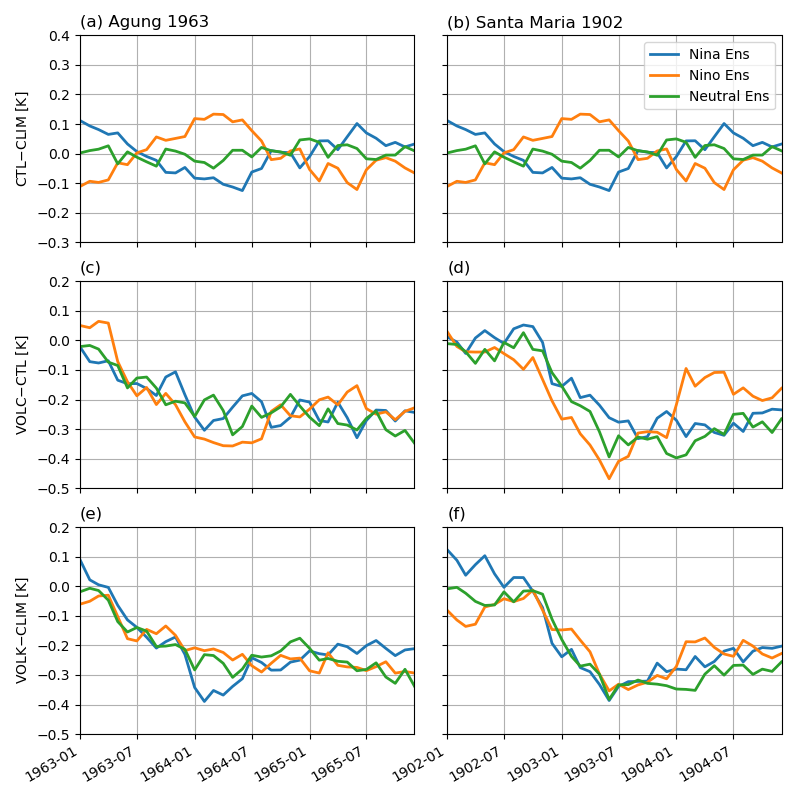

In [107]:
# plot
fill_alpha = 0.2
ylim = (-.5, .2)
xlim_agung = ('1963-01', '1965-12')
xlim_stmaria = ('1902-01', '1904-12')


fig, axes = plt.subplots(3,2,figsize=(8,8), sharey='row', sharex='col')
# ############
plt.sca(axes[0,0])

daas_agung['nina']['ctl-clim'].mean('en').plot(color='C0')
daas_agung['nino']['ctl-clim'].mean('en').plot(color='C1')
daas_agung['neut']['ctl-clim'].mean('en').plot(color='C2')

xticksmonth(range(1,13,6))
plt.title('(a) Agung 1963', loc='left')
plt.ylabel(f'CTL$-$CLIM [K]')
plt.grid(True)
plt.xlabel('')
plt.ylim(-.3,.4)
plt.xlim(xlim_agung)

# ##########
plt.sca(axes[0,1])

daas_stmaria['nina']['ctl-clim'].mean('en').plot(color='C0', label='Nina Ens')
daas_stmaria['nino']['ctl-clim'].mean('en').plot(color='C1', label='Nino Ens')
daas_stmaria['neut']['ctl-clim'].mean('en').plot(color='C2', label='Neutral Ens')

xticksmonth(range(1,13,6))
plt.title('(b) Santa Maria 1902', loc='left')
plt.grid(True)
plt.ylabel('')
plt.xlabel('')
plt.legend(loc='upper right', frameon=True)


# ############
plt.sca(axes[1,0])

daas_agung['nina']['volc-ctl'].mean('en').plot(color='C0')
daas_agung['nino']['volc-ctl'].mean('en').plot(color='C1')
daas_agung['neut']['volc-ctl'].mean('en').plot(color='C2')

xticksmonth(range(1,13,6))
plt.title('(c)', loc='left')
plt.ylabel(f'VOLC$-$CTL [K]')
plt.grid(True)
plt.xlabel('')
plt.ylim(-.5,.2)

# ##########
plt.sca(axes[1,1])

daas_stmaria['nina']['volc-ctl'].mean('en').plot(color='C0')
daas_stmaria['nino']['volc-ctl'].mean('en').plot(color='C1')
daas_stmaria['neut']['volc-ctl'].mean('en').plot(color='C2')

xticksmonth(range(1,13,6))
plt.title('(d)', loc='left')
plt.grid(True)
plt.ylabel('')
plt.xlabel('')

# ############
plt.sca(axes[2,0])

( daas_agung['nina']['ctl-clim'] + daas_agung['nina']['volc-ctl'] ).mean('en').plot(color='C0')
( daas_agung['nino']['ctl-clim'] + daas_agung['nino']['volc-ctl'] ).mean('en').plot(color='C1')
( daas_agung['neut']['ctl-clim'] + daas_agung['neut']['volc-ctl'] ).mean('en').plot(color='C2')

xticksmonth(range(1,13,6))
plt.title('(e)', loc='left')
plt.ylabel(f'VOLK$-$CLIM [K]')
plt.grid(True)
plt.xlabel('')
plt.ylim(-.5,.2)

# ##########
plt.sca(axes[2,1])

( daas_stmaria['nina']['ctl-clim'] + daas_stmaria['nina']['volc-ctl'] ).mean('en').plot(color='C0')
( daas_stmaria['nino']['ctl-clim'] + daas_stmaria['nino']['volc-ctl'] ).mean('en').plot(color='C1')
( daas_stmaria['neut']['ctl-clim'] + daas_stmaria['neut']['volc-ctl'] ).mean('en').plot(color='C2')

xticksmonth(range(1,13,6))
plt.title('(f)', loc='left')
plt.grid(True)
plt.ylabel('')
plt.xlabel('')
plt.xlim(xlim_stmaria)


plt.tight_layout(w_pad=-2)
plt.savefig(figname)